In [1]:
# pivot table
HTML('<h5>The pivot table takes simple column -wise data as input, and groups the entire into a two - dimemsional table that provides a multidimensional summarization of the data.</h5>')


NameError: name 'HTML' is not defined

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df =sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.groupby('sex')[['total_bill']].mean()

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [7]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [8]:
df.pivot_table(index = 'sex', columns = 'smoker',values = 'total_bill')

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\3539524660.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = 'smoker',values = 'total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [9]:
df.pivot_table(index = 'sex', columns = 'smoker',values = 'total_bill', aggfunc = 'std')

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\2170118247.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex', columns = 'smoker',values = 'total_bill', aggfunc = 'std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [10]:
df.pivot_table(index = 'sex',columns = 'smoker',aggfunc = 'size')

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\1864921206.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = 'sex',columns = 'smoker',aggfunc = 'size')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [11]:
# multidimensional

df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = 'total_bill')

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\3831547561.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = 'total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [12]:
df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'],aggfunc = {'size':'mean',
                                                                               'tip':'max',
                                                                               'total_bill':'mean'
                                                                              })

C:\Users\tanis\AppData\Local\Temp\ipykernel_7068\2223205470.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'],aggfunc = {'size':'mean',


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                    \
day                    Fri           Sat    Sun       Thur               Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner      Lunch   
sex    smoker                                                                  
Male   Yes       NaN  2.20   4.73  10.00    6.5  19.171000    NaN  11.386667   
       No        NaN   NaN   3.50   9.00    6.0  18.486500    NaN        NaN   
Female Yes       NaN  3.48   4.30   6.50    4.0  19.218571    NaN  13.260000   
       No        3.0  3.00   3.25   4.67    5.2  15.899167  18.78  15.980000   

                                             
day                          Sat        Sun  
time           Dinner     Dinner     Dinner  
sex    smoker                                
Male   Yes     25.892  21.837778  26.141333  
       No      17.475  19.929063  20.403256  
Female Yes     12.200  20.266667  16.540000  
       No      22.750  19.003846  20.824286

##### df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = 'total_bill',aggfunc = 'sum', margins = True)

In [13]:
df = pd.read_csv('expense_data.csv')

In [14]:
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [17]:
df['month']=df['Date'].dt.month_name()

<Axes: xlabel='month'>

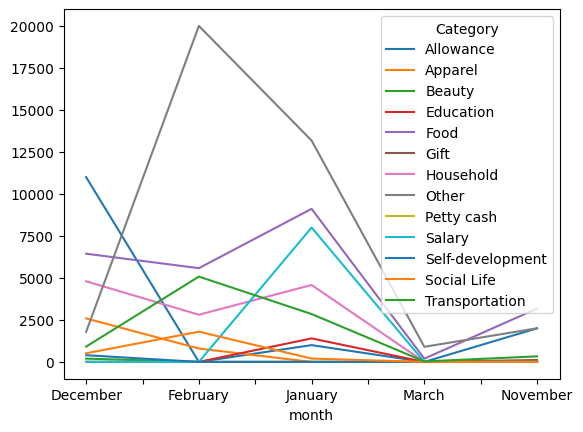

In [18]:
df.pivot_table(index = 'month',columns = 'Category', values ='INR',aggfunc = 'sum',fill_value = 0).plot()

<Axes: xlabel='month'>

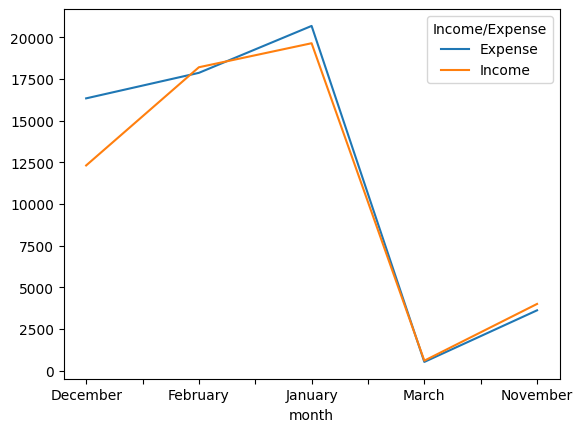

In [19]:
df.pivot_table(index = 'month',columns = 'Income/Expense', values ='INR',aggfunc = 'sum',fill_value = 0).plot()

In [20]:
# What are vectorized operations
a = np.array([1,2,3,4])

In [21]:
a*4

array([ 4,  8, 12, 16])

In [22]:
# problem in vectorized operation in vanilla python 
s = ['cat','mat',None, 'rat']
[i.startswith('c') for i in s]


AttributeError: 'NoneType' object has no attribute 'startswith'

In [23]:
s =pd.Series(['cat','mat',None, 'rat'])
#accessor
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [24]:
df =pd.read_csv('titanic (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
df['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [27]:
df['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [28]:
df['Name'].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [29]:
df['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
df['Name'][df['Name'].str.len() == 82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [2]:
"          Tanish             ".strip()

'Tanish'

In [31]:
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [35]:
df['last name']=df['Name'].str.split(',').str.get(0)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [44]:
df[['title','first name']]=df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand = True)

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last name,title,first name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev.,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [46]:
df['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [49]:
df['title']=df['title'].str.replace('miss.', 'Miss.')
df['title']=df['title'].str.replace('Mlle.', 'Miss.')

In [50]:
df['title'].value_counts()

title
Mr.          517
Miss.        186
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Don.           1
Ms.            1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [54]:
df[df['first name'].str.startswith('A')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last name,title,first name
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss.,"Anna ""Annie"""
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Holverson,Mr.,Alexander Oskar
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss.,Amelie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Serepeca,Miss.,Augusta
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Duran y More,Miss.,Asuncion
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss.,"Adele Kiamie ""Jane"""


In [57]:
df[df['first name'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last name,title,first name


In [62]:
df[df['first name'].str.contains('john',case = False)]['first name']

1            John Bradley (Florence Briggs Thayer)
41     William John Robert (Dorothy Ann Wonnacott)
45                                    William John
98                         John T (Ada Julia Bone)
112                                     David John
117                            William John Robert
160                                  John Hatfield
162                                    John Viktor
165                   Frank John William "Frankie"
168                                         John D
188                                           John
212                                     John Henry
226                                   William John
227                            John Hall ("Henry")
324                                 George John Jr
328                 Frank John (Emily Alice Brown)
401                                           John
418                                   William John
467                                John Montgomery
527                            

In [67]:
df[df['last name'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]['last name']

30          Uruchurtu
49     Arnold-Franchi
207          Albimona
210               Ali
353    Arnold-Franchi
493      Artagaveytia
518             Angle
784               Ali
840          Alhomaki
Name: last name, dtype: object

In [68]:
df[df['last name'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]['last name']

0         Braund
1        Cumings
2      Heikkinen
5          Moran
6       McCarthy
         ...    
884     Sutehall
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: last name, Length: 671, dtype: object

In [69]:
df['Name'].str[:4]

0      Brau
1      Cumi
2      Heik
3      Futr
4      Alle
       ... 
886    Mont
887    Grah
888    John
889    Behr
890    Dool
Name: Name, Length: 891, dtype: object

In [70]:
# timestamp object

In [72]:
# create tmiestamp
pd.Timestamp('2025/12/16')

Timestamp('2025-12-16 00:00:00')

In [73]:
pd.Timestamp('2025-12-16')

Timestamp('2025-12-16 00:00:00')

In [75]:
pd.Timestamp('2025, 12, 16')

Timestamp('2025-12-16 00:00:00')

In [76]:
pd.Timestamp('16th december 2025')

Timestamp('2025-12-16 00:00:00')

In [77]:
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [78]:
pd.Timestamp.now()

Timestamp('2025-12-16 10:28:11.721607')

In [79]:

pd.Timestamp('16th december 2025')
# Generate timestamps for the last 7 days
timestamps = pd.date_range(end=pd.Timestamp.now(), periods=7, freq="D")

# Create a DataFrame with timestamped indices
data = {
    "temperature": [23.3, 34.5, 22.1, 22, 31.3, 33.4, 43.2],
    "humidity": [43, 58, 54, 34, 47, 56, 40]
}
df = pd.DataFrame(data, index=timestamps)

print(df)

                            temperature  humidity
2025-12-10 10:29:54.476786         23.3        43
2025-12-11 10:29:54.476786         34.5        58
2025-12-12 10:29:54.476786         22.1        54
2025-12-13 10:29:54.476786         22.0        34
2025-12-14 10:29:54.476786         31.3        47
2025-12-15 10:29:54.476786         33.4        56
2025-12-16 10:29:54.476786         43.2        40


In [80]:
pd.Timestamp('16th december 2025 10:34AM')

Timestamp('2025-12-16 10:34:00')

In [81]:
import datetime as dt

In [84]:
x =pd.Timestamp(dt.datetime(2025,12,16,10,34,56))

In [85]:
x.year

2025

In [86]:
x.month

12

In [87]:
x.day

16

In [88]:
x.hour

10

In [89]:
x.minute

34

In [90]:
x.second

56

In [91]:
date = np.array('2025-12-15', dtype = np.datetime64)
date

array('2025-12-15', dtype='datetime64[D]')

In [95]:
date + np.arange(12)

array(['2025-12-15', '2025-12-16', '2025-12-17', '2025-12-18',
       '2025-12-19', '2025-12-20', '2025-12-21', '2025-12-22',
       '2025-12-23', '2025-12-24', '2025-12-25', '2025-12-26'],
      dtype='datetime64[D]')

In [102]:
# daterime index

type(pd.DatetimeIndex(['2022/1/1', '2021/1/1', '2020/1/1'])[0])

pandas._libs.tslibs.timestamps.Timestamp

In [104]:
pd.DatetimeIndex([dt.datetime(2023,1,2),dt.datetime(2025,1,2)])

DatetimeIndex(['2023-01-02', '2025-01-02'], dtype='datetime64[ns]', freq=None)

In [106]:
dt_index=pd.DatetimeIndex([pd.Timestamp(2023,1,2),pd.Timestamp(2025,1,2)])

In [109]:
pd.Series([1,2],index = dt_index)

2023-01-02    1
2025-01-02    2
dtype: int64

In [110]:
# to_datetime function


df =pd.read_csv('expense_data.csv')

In [111]:
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [115]:
s = pd.Series(['2023/1/1','2024/1/1','2025/1/1'])
s.str.split('/').str.get(0)

0    2023
1    2024
2    2025
dtype: object

In [118]:
pd.to_datetime(s).dt.month

0    1
1    1
2    1
dtype: int32

In [119]:
pd.to_datetime(s).dt.year

0    2023
1    2024
2    2025
dtype: int32

In [121]:
pd.to_datetime(s).dt.month_name()

0    January
1    January
2    January
dtype: object

In [124]:
pd.to_datetime(s).dt.day_name()

0       Sunday
1       Monday
2    Wednesday
dtype: object

In [127]:
# error
s = pd.Series(['2023/1/1','2024/1/1','2025/130/1'])
pd.to_datetime(s, errors = 'coerce')

0   2023-01-01
1   2024-01-01
2          NaT
dtype: datetime64[ns]

In [128]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [134]:
df['Date']=pd.to_datetime(df['Date'])

In [138]:
df['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int32

In [139]:
df['Date'].dt.month

0       3
1       3
2       3
3       3
4       3
       ..
272    11
273    11
274    11
275    11
276    11
Name: Date, Length: 277, dtype: int32

In [140]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [141]:
df['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [143]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [144]:
df['Date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [145]:
df['Date'].dt.is_month_start

0      False
1      False
2       True
3       True
4       True
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [146]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

<Axes: >

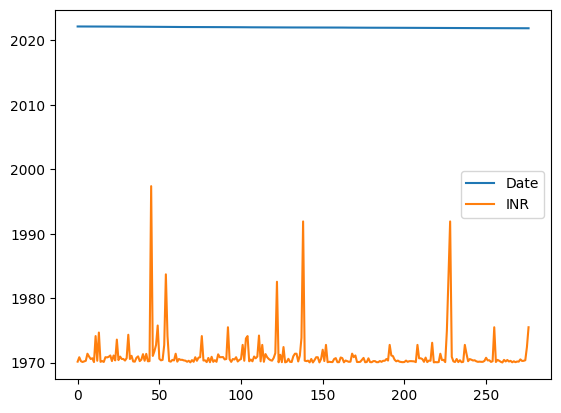

In [151]:
df[['Date','INR']].plot()

In [154]:
df['day_name'] = df['Date'].dt.day_name()

<Axes: xlabel='day_name'>

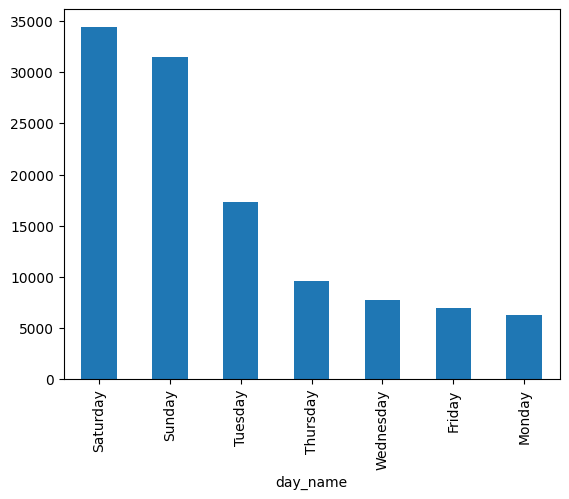

In [161]:
df.groupby('day_name')['INR'].sum().sort_values(ascending = False).plot(kind = 'bar')

In [164]:
df['month_name']=df['Date'].dt.month_name()

<Axes: xlabel='month_name'>

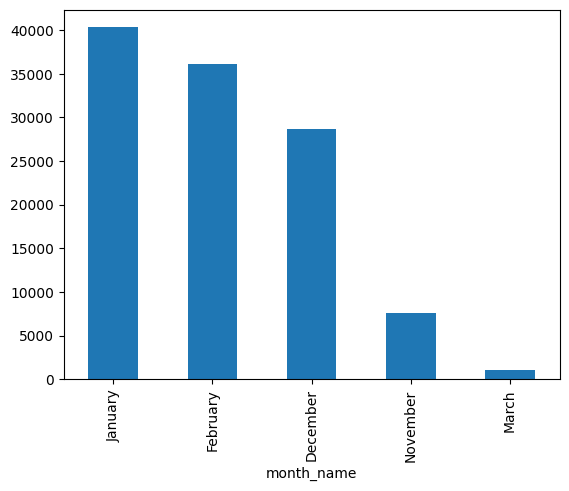

In [169]:
df.groupby('month_name')['INR'].sum().sort_values(ascending = False).plot(kind = 'bar')